# Unit 5 - Financial Planning

In [67]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
# import alpaca_trade_api as tradeapi #alpaca is not available to Canadians
import yfinance
from MCForecastTools import MCSimulation
import requests
import datetime as dt

%matplotlib inline

In [12]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [13]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [14]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [15]:
# Fetch current BTC price
btc_quote = requests.get(btc_url).json()
btc_price = btc_quote['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
eth_quote = requests.get(eth_url).json()
eth_price = eth_quote['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
my_btc_value = my_btc * btc_price
my_eth_value = my_eth * eth_price

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:,.2f} CAD")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:,.2f} CAD")

The current value of your 1.2 BTC is $26,969.87 CAD
The current value of your 5.3 ETH is $8,600.82 CAD


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [16]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [17]:
# Use yfinance because Alpaca is not available in Canada

In [18]:
# Format current date as ISO format
today = dt.date.today()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = 1
end_date = today
start_date = today - dt.timedelta(days=timeframe)

# Get current closing prices for SPY and AGG
df_tickers = yfinance.download(tickers, start=start_date, end=end_date)
# print('Closing Prices:')
# df_tickers['Close']

# Reorganize the DataFrame
# Separate ticker data
df_spy = df_tickers.xs('SPY', axis=1, level=1)
df_agg = df_tickers.xs('AGG', axis=1, level=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat(
    [df_spy, df_agg], axis=1, keys=['SPY','AGG']
).reset_index()
# df_portfolio['Ticker'] = ['SPY', 'AGG']

# Preview DataFrame
df_portfolio

[*********************100%***********************]  2 of 2 completed


Date         SPY                                                  \
               Adj Close       Close        High         Low        Open   
0 2022-12-29  383.440002  383.440002  384.350006  379.079987  379.630005   

                   AGG                                                   
     Volume  Adj Close      Close       High    Low       Open   Volume  
0  66883400  97.449997  97.449997  97.470001  97.18  97.209999  7763300

In [19]:
# Pick AGG and SPY close prices
agg_close_price = df_agg['Close'][0]
spy_close_price = df_spy['Close'][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price:,.2f}")
print(f"Current SPY closing price: ${spy_close_price:,.2f}")

Current AGG closing price: $97.45
Current SPY closing price: $383.44


In [20]:
# Compute the current value of shares
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19172.00
The current value of your 200 AGG shares is $19490.00


### Savings Health Analysis

In [21]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
asset_classs = ['crypto','shares']
crypto_total = my_btc_value + my_eth_value
stock_total = my_spy_value + my_agg_value
asset_total = {'amount': [crypto_total, stock_total]}

# Create savings DataFrame
df_savings = pd.DataFrame(asset_total, index=asset_classs)

# Display savings DataFrame
display(df_savings)

,amount
crypto,35570.685507
shares,38661.999512


<AxesSubplot:>

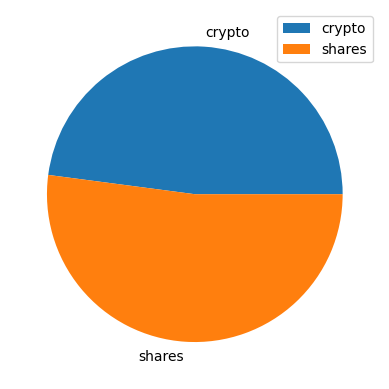

In [22]:
# Plot savings pie chart
df_savings.plot.pie(y='amount',ylabel='')

In [23]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
savings = sum(asset_total['amount'])

# Validate saving health
print(f'Total fund value: {savings:,.2f}')
print(f'Monthly income: {monthly_income:,.2f}')
if savings > emergency_fund:
    print(f"Congratulations. Your fund value surpasses your emergency fund requirement.")
elif savings == emergency_fund:
    print("Congratulations on reaching your financial goal.")
else:
    print(f"Amount needed to reach emergency fund goal: {(emergency_fund-savings):,.2f}")

Total fund value: 74,232.69
Monthly income: 12,000.00
Congratulations. Your fund value surpasses your emergency fund requirement.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [26]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [56]:
# Get 5 years' worth of historical data for SPY and AGG
# Set timeframe to 5 years
timeframe = 5 * 365
end_date = today
start_date = today - dt.timedelta(days=timeframe)
# Download data from yfinance
df_tickers_5y = yfinance.download(tickers, start_date, end_date)
# Adjust keys to match data colunns used by alpaca
df_tickers_5y = df_tickers_5y.drop('Adj Close', axis=1)
alpaca_keys = ['close','high','low','open','volume']

# Reorganize the DataFrame
# Separate ticker data
df_spy_5y = df_tickers_5y.xs('SPY', axis=1, level=1)
df_agg_5y = df_tickers_5y.xs('AGG', axis=1, level=1)
# Set alpaca key names (lower case)
df_spy_5y = df_spy_5y.set_axis(alpaca_keys, axis=1)
df_agg_5y = df_agg_5y.set_axis(alpaca_keys, axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([df_spy_5y, df_agg_5y], axis=1, keys=['SPY','AGG']).dropna()

# Display sample data
df_stock_data.head()

[*********************100%***********************]  2 of 2 completed


SPY                                                \
                 close        high         low        open    volume   
Date                                                                   
2018-01-02  268.769989  268.809998  267.399994  267.839996  86655700   
2018-01-03  270.470001  270.640015  268.959991  268.959991  90070400   
2018-01-04  271.609985  272.160004  270.540009  271.200012  80636400   
2018-01-05  273.420013  273.559998  271.950012  272.510010  83524000   
2018-01-08  273.920013  274.100006  272.980011  273.309998  57319200   

                   AGG                                               
                 close        high         low        open   volume  
Date                                                                 
2018-01-02  109.169998  109.309998  108.970001  109.260002  8850900  
2018-01-03  109.180000  109.250000  109.089996  109.250000  2441700  
2018-01-04  109.110001  109.150002  108.970001  109.019997  2945400  
2018-01-05  109.040001  109.150002  108.949997  109.150002  4322900  
2018-01-08  109.010002  109.110001  108.949997  109.110001  3394500

In [72]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4], # SPY(60%), AGG(40%)
    num_simulation = 500,
    num_trading_days = 252 * 30 # 252 trading days per year
)

In [73]:
# Printing the simulation input data
MC_30year.portfolio_data.head()

SPY                                                \
                 close        high         low        open    volume   
Date                                                                   
2018-01-02  268.769989  268.809998  267.399994  267.839996  86655700   
2018-01-03  270.470001  270.640015  268.959991  268.959991  90070400   
2018-01-04  271.609985  272.160004  270.540009  271.200012  80636400   
2018-01-05  273.420013  273.559998  271.950012  272.510010  83524000   
2018-01-08  273.920013  274.100006  272.980011  273.309998  57319200   

                                AGG                                      \
           daily_return       close        high         low        open   
Date                                                                      
2018-01-02          NaN  109.169998  109.309998  108.970001  109.260002   
2018-01-03     0.006325  109.180000  109.250000  109.089996  109.250000   
2018-01-04     0.004215  109.110001  109.150002  108.970001  109.019997   
2018-01-05     0.006664  109.040001  109.150002  108.949997  109.150002   
2018-01-08     0.001829  109.010002  109.110001  108.949997  109.110001   

                                  
             volume daily_return  
Date                              
2018-01-02  8850900          NaN  
2018-01-03  2441700     0.000092  
2018-01-04  2945400    -0.000641  
2018-01-05  4322900    -0.000642  
2018-01-08  3394500    -0.000275

In [74]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30year.calc_cumulative_return()
#TODO: "MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented."

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 110.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 120.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 130.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 140.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 150.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 160.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 170.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 180.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 190.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 200.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 210.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 220.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 230.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 240.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 250.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 260.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 270.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 280.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 290.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 300.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 310.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 320.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 330.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 340.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 350.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 360.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 370.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 380.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 390.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 400.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 410.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 420.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 430.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 440.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 450.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 460.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 470.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 480.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

Running Monte Carlo simulation number 490.


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:118: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:1

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001259,0.995206,1.005701,0.999382,0.994078,0.994813,0.999412,0.996807,0.999692,0.998428,...,1.015547,1.005411,0.995006,0.999223,0.976745,1.015167,0.999198,0.988007,1.009266,1.000620
2,1.017177,0.997206,1.013525,1.011891,1.012499,0.992929,0.990555,0.992721,1.003233,1.020263,...,1.007852,1.010519,0.994408,0.994248,0.972623,1.022112,0.997759,0.982982,1.009528,1.008881
3,1.008700,1.004441,1.033490,1.008767,1.015578,0.978942,1.002848,0.982721,1.007061,1.019294,...,0.998686,1.002130,1.007393,0.992010,0.968149,1.022118,0.998361,0.973719,1.001892,1.006985
4,1.013236,0.980106,1.031922,0.992997,1.014638,0.974948,0.990350,0.985888,1.004483,1.002050,...,0.999175,0.998643,1.002333,0.989711,0.964675,1.025208,0.994183,0.992402,1.000073,1.015143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.580550,1.325851,9.727626,2.236985,0.862454,3.729989,3.160842,7.288884,4.449089,2.702961,...,4.957478,0.866814,2.009294,1.288196,2.424643,2.087511,3.499516,1.109697,2.369129,9.386680
7557,1.578606,1.321442,9.801669,2.217399,0.874084,3.689551,3.128998,7.275876,4.473470,2.703987,...,4.983370,0.857962,2.028051,1.301442,2.424920,2.073991,3.504426,1.112322,2.348657,9.363754
7558,1.582454,1.332754,9.811218,2.202313,0.887934,3.708114,3.123065,7.260326,4.484029,2.702777,...,5.024700,0.866467,2.049193,1.281838,2.419798,2.102133,3.532457,1.115417,2.381895,9.327594
7559,1.587220,1.340241,9.758525,2.209242,0.873760,3.683352,3.150380,7.288524,4.496833,2.707025,...,4.954644,0.852817,2.073000,1.275646,2.398803,2.085385,3.532263,1.118223,2.375829,9.265640


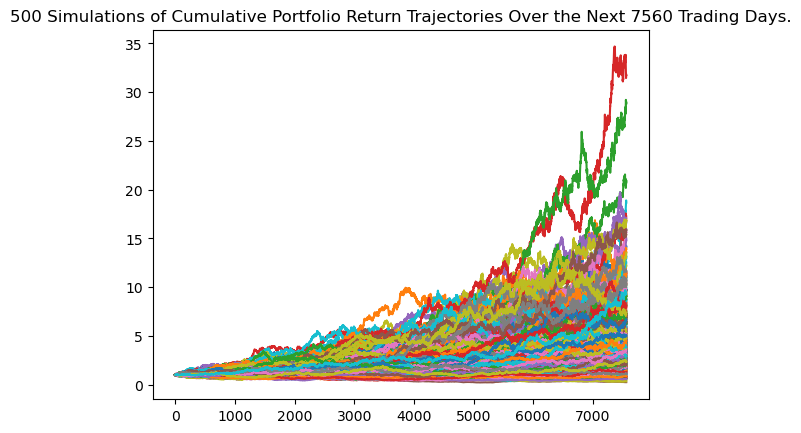

In [76]:
# Plot simulation outcomes
line_plot = MC_30year.plot_simulation()

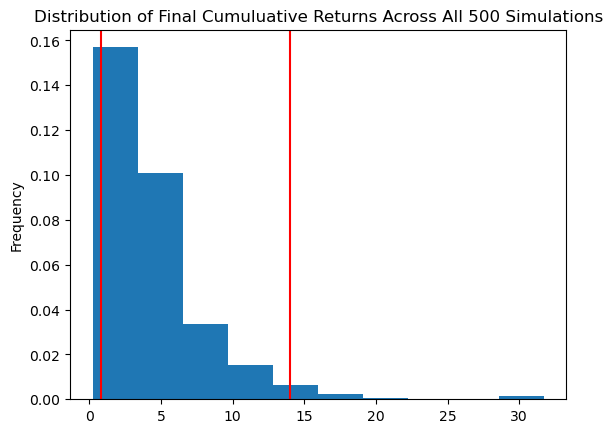

In [77]:
# Plot probability distribution and confidence intervals
dist_plot = MC_30year.plot_distribution()

### Retirement Analysis

In [80]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary = MC_30year.summarize_cumulative_return()

# Print summary statistics
print(mc_summary)

count           500.000000
mean              4.510826
std               3.621560
min               0.238990
25%               2.195663
50%               3.408703
75%               5.642802
max              31.716814
95% CI Lower      0.808726
95% CI Upper     14.021973
Name: 7560, dtype: float64


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:173: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [86]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = initial_investment * mc_summary['95% CI Lower']
ci_upper = initial_investment * mc_summary['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $20,000 in the portfolio over the next 30 years will end within in the range of $16,174.52 and $280,439.47


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [87]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = initial_investment * mc_summary['95% CI Lower']
ci_upper = initial_investment * mc_summary['95% CI Upper']

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower:,.2f} and ${ci_upper:,.2f}")

There is a 95% chance that an initial investment of $30,000.0 in the portfolio over the next 30 years will end within in the range of $24,261.79 and $420,659.20


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [91]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4], # SPY(60%), AGG(40%)
    num_simulation = 100,
    num_trading_days = 252 * 5 # 252 trading days per year
)

In [92]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.017120,1.012588,1.001758,1.015751,1.001711,0.986591,1.019714,1.003885,1.000106,0.999226,...,1.002497,1.005673,0.991986,0.992251,1.003119,0.988067,0.988869,1.001400,0.994263,1.005190
2,0.998136,1.012316,1.000136,1.010523,1.004106,0.988666,1.033087,1.013243,1.008224,1.003709,...,0.989948,1.011439,0.985088,0.982120,0.991211,0.988832,0.982529,1.016807,1.009657,1.014266
3,1.004543,1.005664,1.002785,1.009942,1.010449,0.985488,1.039522,1.014193,1.009284,1.002863,...,0.991875,1.006499,0.979554,0.998944,1.011062,1.000737,0.971191,1.016067,1.016414,1.005097
4,1.015426,1.005090,0.988213,1.004254,1.003420,0.989461,1.018398,1.026037,1.020321,1.004530,...,0.990168,1.006602,1.000502,1.012745,1.013243,1.003619,0.980035,1.019650,1.009565,1.014029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.193095,0.957846,1.345839,0.637707,0.958929,1.554860,0.838647,1.388837,1.154754,1.377411,...,1.256807,1.294201,1.259041,0.921441,1.360431,0.953168,0.970484,1.028231,1.080473,1.708923
1257,1.180929,0.962099,1.336802,0.631110,0.954568,1.567307,0.840753,1.390661,1.138961,1.379499,...,1.245631,1.314704,1.252782,0.917877,1.360396,0.947326,0.969034,1.018145,1.086671,1.708482
1258,1.172387,0.968804,1.357215,0.625144,0.951919,1.565808,0.852183,1.379880,1.152905,1.378046,...,1.257165,1.321614,1.262065,0.923151,1.364436,0.958781,0.961329,1.026507,1.086334,1.722441
1259,1.176167,0.974004,1.340117,0.627391,0.958832,1.602378,0.849656,1.377995,1.168293,1.367604,...,1.247089,1.326685,1.264856,0.920509,1.369496,0.961474,0.955645,1.022667,1.080367,1.733011


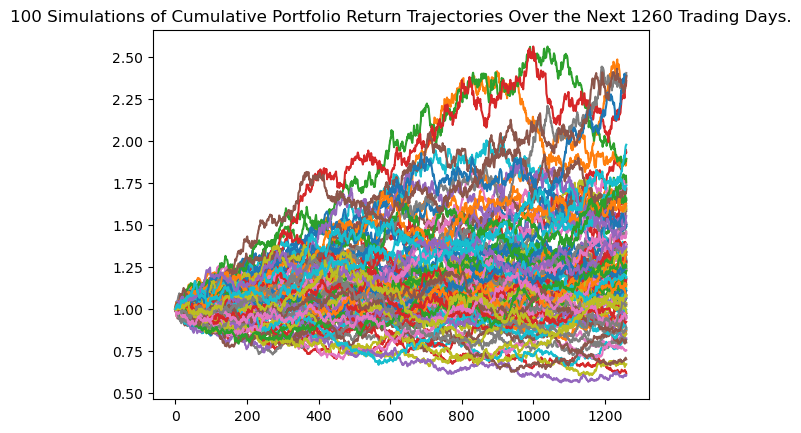

In [95]:
# Plot simulation outcomes
line_plot_5y = MC_5year.plot_simulation()

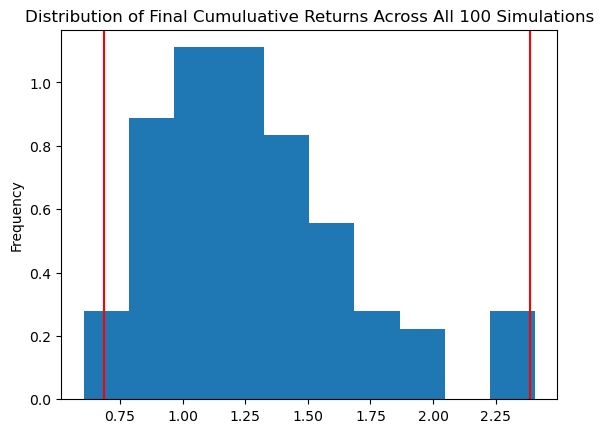

In [96]:
# Plot probability distribution and confidence intervals
dist_plot_5y = MC_5year.plot_distribution()

In [98]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary_5y = MC_5year.summarize_cumulative_return()

# Print summary statistics
print(mc_summary_5y)

count           100.000000
mean              1.290139
std               0.397147
min               0.605807
25%               0.994051
50%               1.244448
75%               1.502313
max               2.406506
95% CI Lower      0.685513
95% CI Upper      2.387488
Name: 1260, dtype: float64


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:173: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [101]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_five = mc_summary_5y['95% CI Upper'] * initial_investment
ci_lower_five = mc_summary_5y['95% CI Lower'] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five:,.2f} and ${ci_upper_five:,.2f}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $41,130.80 and $143,249.29


### Ten Years Retirement Option

In [102]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.6,0.4], # SPY(60%), AGG(40%)
    num_simulation = 100,
    num_trading_days = 252 * 10 # 252 trading days per year
)

In [103]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996572,1.002764,1.002449,0.991250,0.995488,1.003544,1.002187,0.991332,1.000157,1.012192,...,1.007467,1.007116,1.008257,0.994572,0.998971,0.990494,0.993983,0.992616,0.998887,1.010767
2,0.998392,1.007313,0.993276,0.989884,0.994647,1.005707,1.013400,0.996204,0.996500,1.011947,...,0.998257,1.017410,1.021561,0.991197,0.999807,0.992314,0.987035,1.002198,1.004091,1.004679
3,0.982568,1.004729,0.989640,0.991210,1.004681,0.998987,1.019254,0.991462,0.993234,1.003534,...,0.984410,1.018324,1.014791,1.001415,0.988826,0.982376,0.985296,1.005389,0.999711,1.008331
4,0.976980,1.024220,0.986811,0.989160,0.999664,1.002109,1.014090,1.000650,0.989338,1.017104,...,0.983060,1.020560,1.009388,1.003626,0.978581,0.975088,0.975850,0.993576,1.010070,1.010348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.980124,1.914934,1.823250,1.783689,1.375760,1.024651,1.166139,1.383061,1.287614,2.969874,...,1.474367,0.895678,0.906228,4.786042,1.674030,1.717155,1.605650,0.654292,1.240918,1.670685
2517,0.980232,1.915122,1.821511,1.790696,1.394900,1.054326,1.156284,1.401369,1.298858,2.978818,...,1.452801,0.897486,0.891796,4.858948,1.667345,1.722633,1.594231,0.654357,1.232435,1.660688
2518,0.990962,1.943371,1.844058,1.795525,1.378752,1.059148,1.163520,1.395736,1.315996,2.982496,...,1.435959,0.898044,0.897292,4.813660,1.662371,1.716153,1.596672,0.653170,1.221099,1.667122
2519,0.999977,1.941786,1.833653,1.809993,1.370227,1.068404,1.158722,1.425525,1.329307,3.001562,...,1.440876,0.902465,0.890774,4.805022,1.652766,1.718977,1.601113,0.657459,1.228210,1.637977


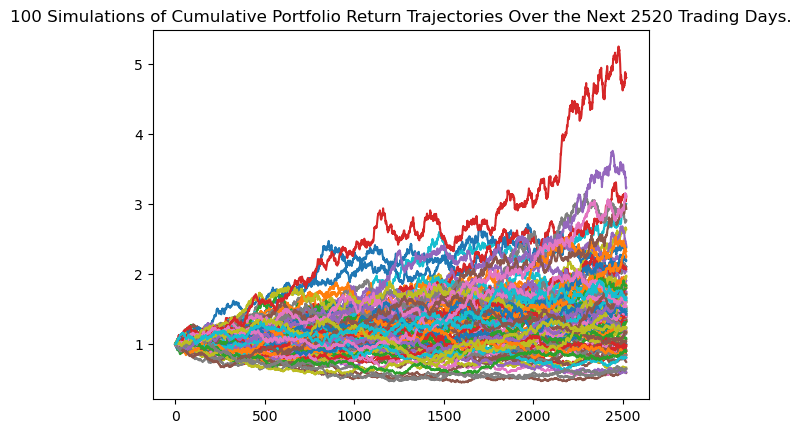

In [104]:
# Plot simulation outcomes
line_plot = MC_10year.plot_simulation()

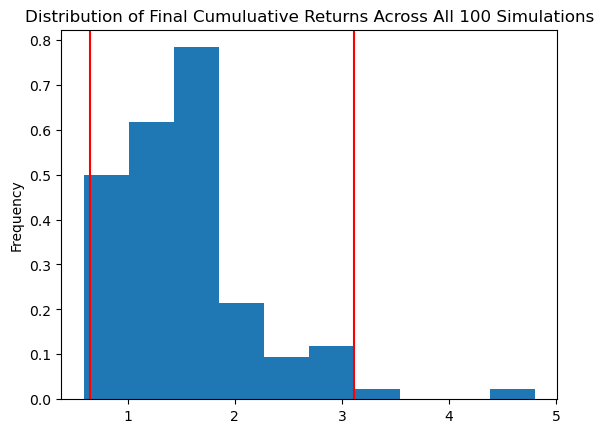

In [105]:
# Plot probability distribution and confidence intervals
dist_plot = MC_10year.plot_distribution()

In [106]:
# Fetch summary statistics from the Monte Carlo simulation results
mc_summary_10y = MC_10year.summarize_cumulative_return()

# Print summary statistics
print(mc_summary_10y)

count           100.000000
mean              1.548529
std               0.668819
min               0.589685
25%               1.156952
50%               1.459953
75%               1.765211
max               4.803218
95% CI Lower      0.644855
95% CI Upper      3.108737
Name: 2520, dtype: float64


/Users/juil/school/fintech-uoftbootcamp/classwork/assignments/unit05-assignment/MCForecastTools.py:173: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [109]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_upper_ten = mc_summary_10y['95% CI Upper'] * initial_investment
ci_lower_ten = mc_summary_10y['95% CI Lower'] * initial_investment

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment:,} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten:,.2f} and ${ci_upper_ten:,.2f}")

There is a 95% chance that an initial investment of $60,000 in the portfolio over the next 10 years will end within in the range of $38,691.27 and $186,524.25
